# Kalman Filter

In [4]:
#pip install filterpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 177 kB 3.5 MB/s eta 0:00:01
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=0f7321e69906dacfd5b5672767052b4cf1baa83b1d45dccd6d1965b61960eea0
  Stored in directory: /Users/flaviaferrusmarimon/Library/Caches/pip/wheels/53/e6/de/a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
Successfully built filterpy
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


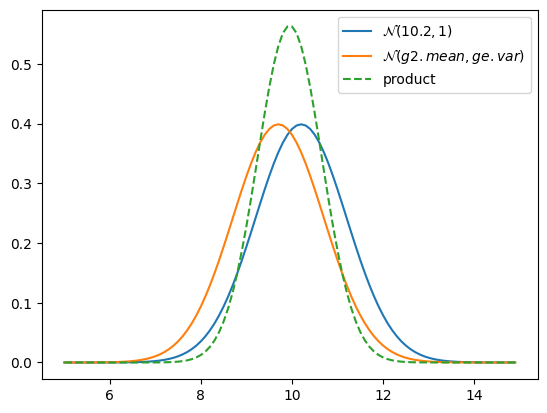

In [5]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import filterpy.stats as stats
from collections import namedtuple


gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: f'𝒩(μ={s[0]:.3f}, 𝜎²={s[1]:.3f})'

def predict(pos, movement):
    return gaussian(pos.mean + movement.mean, pos.var + movement.var)

def gaussian_multiply(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean) / (g1.var + g2.var)
    variance = (g1.var * g2.var) / (g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multiply(likelihood, prior)
    return posterior

def plot_products(g1, g2): 
    plt.figure()
    product = gaussian_multiply(g1, g2)

    xs = np.arange(5, 15, 0.1)
    ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$' + f'$({g1.mean},{g1.var})$')

    ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
    plt.plot(xs, ys, label='$\mathcal{N}$' + '$({g2.mean},{ge.var})$')

    ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
    plt.plot(xs, ys, label='product', ls='--')
    plt.legend();
    plt.show()
    
z1 = gaussian(10.2, 1)
z2 = gaussian(9.7, 1)
 
plot_products(z1, z2)

In [7]:
#pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 4.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ipywidgets import interact

def interactive_gaussian(m1, m2, v1, v2):
    g1 = gaussian(m1, v1)
    g2 = gaussian(m2, v2)
    plot_products(g1, g2)
    
interact(interactive_gaussian,
         m1=(5, 10., .5), m2=(10, 15, .5), 
         v1=(.1, 2, .1), v2=(.1, 2, .1))

# Kalman Filter 2

In [1]:
import numpy as np

class KalmanFilter:
    def __init__(self, F, H, Q, R, x0, P0):
        self.F = F  # State transition model
        self.H = H  # Measurement model
        self.Q = Q  # Process noise covariance
        self.R = R  # Measurement noise covariance
        self.x = x0  # Initial state estimate
        self.P = P0  # Initial covariance estimate
    
    def predict(self):
        # Predict the state
        self.x = np.dot(self.F, self.x)
        # Predict the estimate covariance
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
    
    def update(self, z):
        # Compute the Kalman Gain
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        
        # Update the state estimate
        y = z - np.dot(self.H, self.x)
        self.x = self.x + np.dot(K, y)
        
        # Update the estimate covariance
        I = np.eye(self.F.shape[0])
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)
    
    def current_state(self):
        return self.x

# Example usage
if __name__ == "__main__":
    # Define the system parameters
    F = np.array([[1, 1], [0, 1]])  # State transition model
    H = np.array([[1, 0]])          # Measurement model
    Q = np.array([[1, 0], [0, 1]])  # Process noise covariance
    R = np.array([[1]])             # Measurement noise covariance
    x0 = np.array([0, 1])           # Initial state estimate
    P0 = np.array([[1, 0], [0, 1]]) # Initial covariance estimate

    # Create a Kalman filter
    kf = KalmanFilter(F, H, Q, R, x0, P0)

    # Measurements (z)
    measurements = [1, 2, 3]

    # Apply the Kalman filter
    for z in measurements:
        kf.predict()
        kf.update(np.array([z]))
        print(f"Updated state estimate: {kf.current_state()}")


Updated state estimate: [1. 1.]
Updated state estimate: [2. 1.]
Updated state estimate: [3. 1.]


# Kalman Filter 3

## Shooting method

In [1]:
import pandas as pd
import numpy as np
import math
import os
import sys
import matplotlib.pyplot as plt

In [2]:
## Importing custom functions from different folder:

# Get the current directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder = 'Implementation'
data_folder = os.path.join(parent_dir, folder)

# Construct the full file path
file_ = 'utils_data'
full_path = os.path.join(data_folder, file_)
print(full_path)
print(data_folder)
sys.path.append(data_folder)  

# Load the functions from .py file  
try:
    from utils_model import numericalSimulation, ComputeFunctional, ComputeVel
    from utils_model import generate_trajectory, plot_simulation, generate_trajectory_vel, optimize_Sigma, plot_multiple_trajectories, plotting_params
except ModuleNotFoundError as e:
    print("ModuleNotFoundError:", e)

/Users/flaviaferrusmarimon/UB/MAM/TFM/Codes1/MotorControlPrediction/Implementation/utils_data
/Users/flaviaferrusmarimon/UB/MAM/TFM/Codes1/MotorControlPrediction/Implementation


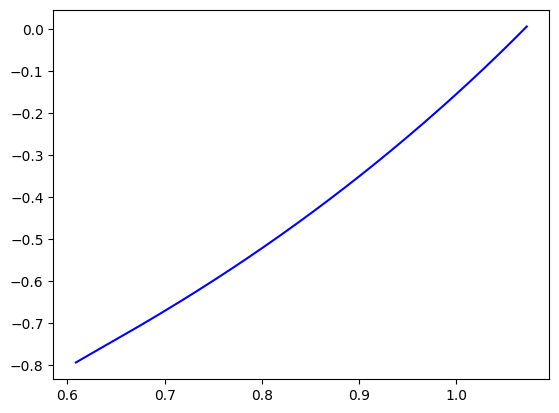

In [3]:
x, y, T, parameters = generate_trajectory()

In [4]:
print(parameters)
parameters2 = ( 3.7, -0.15679707,  0.97252444,  0.54660283, -6.75775885, -0.06253371)
print(parameters2)             

[ 3.7        -0.15679707 -0.45744691  0.40540147 -0.29883889  0.08127571]
(3.7, -0.15679707, 0.97252444, 0.54660283, -6.75775885, -0.06253371)


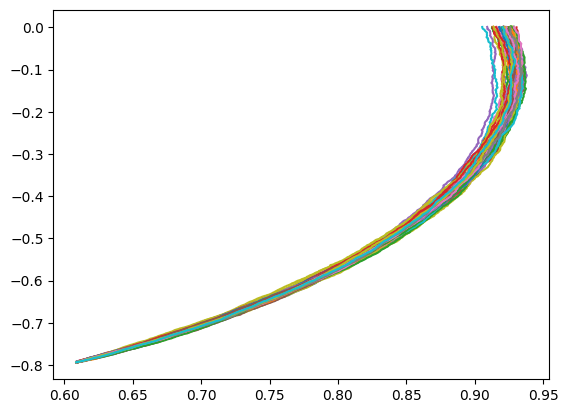

In [5]:
## OPTIMAL OBTAINED RESULTS: 
n = 50
sigma = 0.27243061639444527
gamma = 2.95749222
epsilon = 3.05271805
alpha = -3.21789397
timestep = 1./500

for i in range(n):
        x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = sigma, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
        plt.plot(x, y) 

## Configuration 1 scale

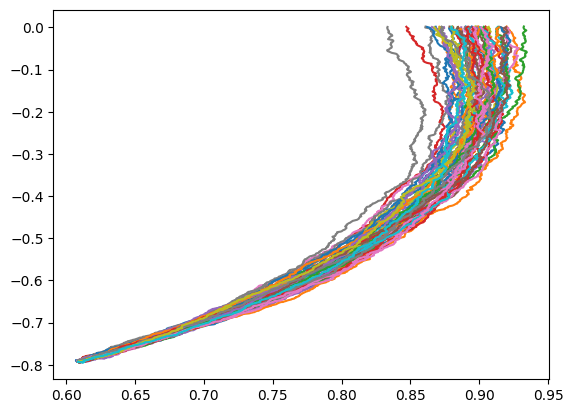

In [6]:
for i in range(n):
        x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 1.0, 
                        sigma = 0.5, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*7/24, angle0=0, p=(.2,0), r=.1)
        plt.plot(x, y) 

### Configuration 2 scale: 

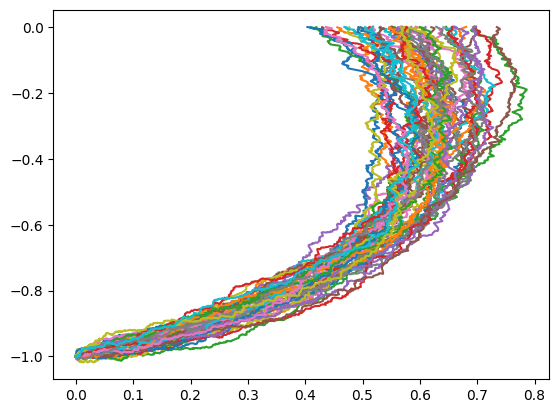

In [7]:
for i in range(n):
        x, y, v, w, ux, uy, T= numericalSimulation(x_0 = (0,0,0,0),  p_T = 2.0, 
                        sigma = 0.5, gamma = gamma, epsilon = epsilon, alpha = alpha,
                        u_0 = parameters2[:2], l_0 = parameters2[2:], 
                        i_max = 1000, dt = timestep,
                        Autoregr = False, 
                        Arc = True, angle=math.pi*12/24, angle0=0, p=(.2,0), r=.1)
        plt.plot(x, y) 

In [8]:

def KalmanSimulation(in_con=(0,0,0,0), x_T=1., T=1., T_1=.2, sigma=1, alpha=.5, epsilon=.5, gamma=.5,
                    step=500, angle=math.pi*7/24, p=(.2,0), r=.1, Arc=True, 
                    params = parameters):
    
    x,v,y,w = in_con
    
    x_Story=[]
    v_Story=[]
    y_Story=[]
    w_Story=[]
    
    timestep=T/step
    l=x_T-x
    i=0
    Wt=0.
    
    ux, uy, lambda1, lambda3,l1,l3 = params
    
    Xp=np.array([x,v,ux,lambda1,y,w,uy,lambda3])
    Pp=np.zeros((8,8))
    
    Q=np.zeros((8,8))
    
    H=np.zeros(8)
    H[4]=1.
    
    M=np.zeros((8,8))
    for j in range(8):
        M[j][j]=1.

    for j in range(7):
        M[j][j+1]=timestep
    M[3][4]=0
    M[2][3]=l/(1-gamma)*timestep
    M[6][7]=l/(gamma)*timestep
    
    while(i<=step):
        
        if(i>=step*T_1):
            Xp[3]=l1
            Xp[7]=l3
        
        Q[4][4]=timestep*alpha*sigma*ux**2
        
        omega=timestep*alpha*ux**2*sigma*np.random.normal(0.,np.sqrt(timestep),1)
        
        Xm=np.dot(M,Xp)
        Pm=np.dot(np.dot(M,Pp),M.T)+Q
        
        K=np.dot(Pm,H)/(np.dot(H,np.dot(Pm,H))+timestep*alpha*sigma*ux**2)
        Xp=Xm+K*(omega)
        #print(i,K[4], omega)
        Pp=np.dot(np.identity(8)-np.outer(K,H),Pm)        
        
        x,v,ux,lambda1,y,w,uy,lambda3=Xp
        
        #We record the story
        if(Arc):
            x_Story.append((1+y)*np.cos(angle*(x/x_T-1)))
            y_Story.append((1+y)*np.sin(angle*(x/x_T-1)))
        else:
            x_Story.append(x)
            y_Story.append(y)
        v_Story.append(v)
        w_Story.append(w)
        
        i=i+1
        
    return x_Story, v_Story ,y_Story, w_Story

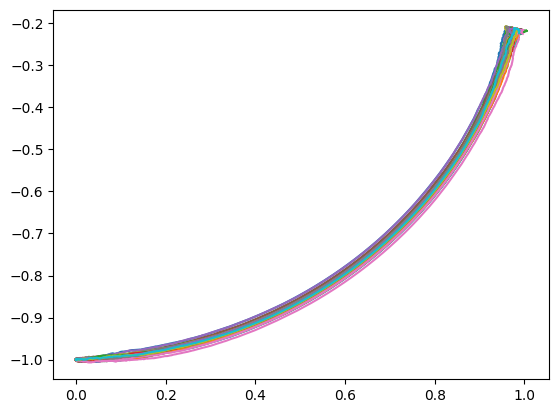

In [9]:
for i in range(n):
    x,v,y,w=KalmanSimulation(params=parameters2, angle=math.pi*12/24)
    plt.plot(x,y)
